In [5]:
import numpy as np
import sys
import os
sys.path.append(os.path.abspath('..'))
from src.utils_py.auxil import *
from src.utils_py.io.gro import read_gro, write_gro
from src.utils_py.geom.Box import Box
from src.utils_py.geom.Droplet import Droplet
from src.utils_py.geom.Doughnut import Doughnut
from src.utils_py.geom.Worm import Worm
from src.utils_py.geom.Roll import Roll
from src.utils_py.geom.Perforation import Perforation
from src.utils_py.assembler.build import build_system
from src.utils_py.gro.Structure import Structure

---

## Interface generators validation

In [6]:
''' Don't change!!! '''
insertion_limit = int(1e5)
rotation_limit = 1000
package = 0.3
distance = {'min': 0.08**2, 'opt': 0.12**2}

In [7]:
interface_type = 'doughnut'
extention = 'delta'

WIDTH_X, WIDTH_Y, H = 15, 15, 15
# WIDTH_X, WIDTH_Y, H = 5, 5, 2.5
l = WIDTH_X / H
phi = 0.1
th = np.deg2rad(120)
delta = 0.0

centering = False

In [8]:
box = np.array([WIDTH_X, WIDTH_Y, H])

structure = Structure(
    title='Points',
    box=box,
    atoms=np.empty(0, dtype=object),
    atoms_xyz=np.zeros((0, 3))
)

points = structure.atoms_xyz

names = ['point']
density = [12] # nm-3 Water like density


region = Worm(
    box / 2,
    box,
    l,
    phi,
    th=th,
    delta=delta,
    extention=extention,
    # centering=centering
)

insert_shapes = [region]
shapes = [region]
numbers = list(np.round(np.array([shapes[i].get_volume() * density[i] for i in range(len(names))])).astype(int))
# numbers = [600]

structure = build_system(
    '../', structure, names, numbers, insert_shapes, points,
    insertion_limit=insertion_limit,
    rotation_limit=rotation_limit,
    package=package,
    min_dist2=distance['min']
)

filename = '1'

dir_path = '../data/test'
if not os.path.exists(dir_path):
    os.makedirs(dir_path)

with open(os.path.join(dir_path, f'{filename}.gro'), 'w') as f:
    f.write(write_gro(structure))

Number of molecules:
point 	 4050

Filling system:


  0%|          | 0/4050 [00:00<?, ?it/s]

100%|██████████| 4050/4050 [00:01<00:00, 3422.27it/s]


In [12]:
r_worm_delta(1, 0.1, 0) * H

2.6761861742291564

In [10]:
region.rd * H

4.319117867227291

---

In [32]:
import matplotlib.pyplot as plt

In [31]:
z = np.linspace(-0.5, 0.5, 100)
y = y_perforation_theta(z, 2, 0.5, np.pi)

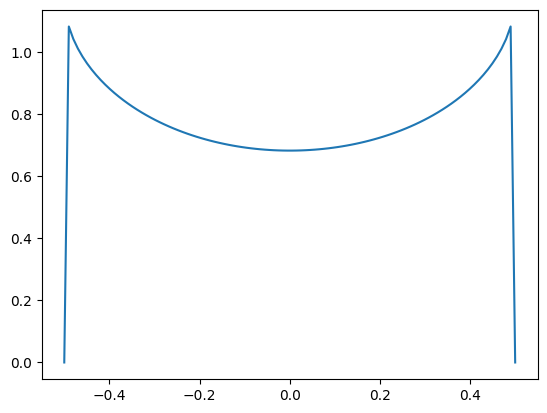

In [33]:
plt.plot(z, y)

In [34]:
np.trapz(y, z)

0.7785165166045581